# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [4]:
print(soup.prettify()[1:500])

!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [6]:
table = soup.find('table', attrs={'class': 'history-rates-data'})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-08-31">
     August 31, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-08-31">
     2023-8-31
    </a>
   </td>
   <td>
    <span class="w">
     <span class="


In [7]:
table.find_all('tr')[:5]

[<tr>
 <th class="ltr-bidi-fix">Date</th>
 <th class="ltr-bidi-fix">US Dollar to Indonesian Rupiah</th>
 </tr>,
 <tr>
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-31">August 31, 2023</a>
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-31">2023-8-31</a>
 </td>
 <td>
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,225</span></span>
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,225</span></span>
 </td>
 </tr>,
 <tr class="odd">
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-30">August 30, 2023</a>
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-30">2023-8-30</a>
 </td>
 <td>
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,223</span><

In [8]:
table.find_all('a',attrs={'class':'w'})[:5]

[<a class="w" href="/exchange-rate-history/usd-idr-2023-08-31">August 31, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-30">August 30, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-29">August 29, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-28">August 28, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-25">August 25, 2023</a>]

In [9]:
table.find_all('a',attrs={'class':'w'})[0].text

'August 31, 2023'

In [10]:
table.find_all('a',attrs={'class':'w'})[1].text

'August 30, 2023'

In [17]:
table.find_all('span',attrs={'class':'n'})[:5]

[<span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,225</span></span>,
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,223</span></span>,
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,202</span></span>,
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,248</span></span>,
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,298</span></span>]

In [18]:
table.find_all('span',attrs={'class':'n'})[0].text

'$1 = Rp15,225'

In [19]:
table.find_all('span',attrs={'class':'n'})[1].text

'$1 = Rp15,223'

Finding row length.

In [14]:
table.find_all('tr')[1].text

'\n\nAugust 31, 2023\n2023-8-31\n\n\n$1 = Rp15,225\n$1 = Rp15,225\n\n'

In [15]:
row = table.find_all('tr')
row_length = len(row)
row_length

133

Do the scrapping process here (please change this markdown with your explanation)

In [29]:
temp = [] #initiating a tuple

for i in range(1, row_length-4):

    #scrapping process
    #get date
    date = table.find_all('a', attrs={'class': 'w'})[i].text
    #get currency
    currency = table.find_all('span', attrs={'class':'n'})[i].text
    
    temp.append((date, currency))
temp 

[('August 30, 2023', '$1 = Rp15,223'),
 ('August 29, 2023', '$1 = Rp15,202'),
 ('August 28, 2023', '$1 = Rp15,248'),
 ('August 25, 2023', '$1 = Rp15,298'),
 ('August 24, 2023', '$1 = Rp15,246'),
 ('August 23, 2023', '$1 = Rp15,301'),
 ('August 22, 2023', '$1 = Rp15,324'),
 ('August 21, 2023', '$1 = Rp15,325'),
 ('August 18, 2023', '$1 = Rp15,321'),
 ('August 17, 2023', '$1 = Rp15,343'),
 ('August 16, 2023', '$1 = Rp15,369'),
 ('August 15, 2023', '$1 = Rp15,318'),
 ('August 14, 2023', '$1 = Rp15,330'),
 ('August 11, 2023', '$1 = Rp15,324'),
 ('August 10, 2023', '$1 = Rp15,263'),
 ('August 9, 2023', '$1 = Rp15,214'),
 ('August 8, 2023', '$1 = Rp15,212'),
 ('August 7, 2023', '$1 = Rp15,225'),
 ('August 4, 2023', '$1 = Rp15,153'),
 ('August 3, 2023', '$1 = Rp15,148'),
 ('August 2, 2023', '$1 = Rp15,227'),
 ('August 1, 2023', '$1 = Rp15,121'),
 ('July 31, 2023', '$1 = Rp15,099'),
 ('July 28, 2023', '$1 = Rp15,107'),
 ('July 27, 2023', '$1 = Rp15,102'),
 ('July 26, 2023', '$1 = Rp15,009'),
 

In [42]:
temp = temp[::-1]
temp

[('August 30, 2023', '$1 = Rp15,223'),
 ('August 29, 2023', '$1 = Rp15,202'),
 ('August 28, 2023', '$1 = Rp15,248'),
 ('August 25, 2023', '$1 = Rp15,298'),
 ('August 24, 2023', '$1 = Rp15,246'),
 ('August 23, 2023', '$1 = Rp15,301'),
 ('August 22, 2023', '$1 = Rp15,324'),
 ('August 21, 2023', '$1 = Rp15,325'),
 ('August 18, 2023', '$1 = Rp15,321'),
 ('August 17, 2023', '$1 = Rp15,343'),
 ('August 16, 2023', '$1 = Rp15,369'),
 ('August 15, 2023', '$1 = Rp15,318'),
 ('August 14, 2023', '$1 = Rp15,330'),
 ('August 11, 2023', '$1 = Rp15,324'),
 ('August 10, 2023', '$1 = Rp15,263'),
 ('August 9, 2023', '$1 = Rp15,214'),
 ('August 8, 2023', '$1 = Rp15,212'),
 ('August 7, 2023', '$1 = Rp15,225'),
 ('August 4, 2023', '$1 = Rp15,153'),
 ('August 3, 2023', '$1 = Rp15,148'),
 ('August 2, 2023', '$1 = Rp15,227'),
 ('August 1, 2023', '$1 = Rp15,121'),
 ('July 31, 2023', '$1 = Rp15,099'),
 ('July 28, 2023', '$1 = Rp15,107'),
 ('July 27, 2023', '$1 = Rp15,102'),
 ('July 26, 2023', '$1 = Rp15,009'),
 

## Creating data frame & Data wrangling

Put the array into dataframe

In [25]:
import pandas as pd

df = pd.DataFrame(temp,columns =('date','currency'))
df.head()

,date,currency
0,"August 30, 2023","$1 = Rp15,223"
1,"August 29, 2023","$1 = Rp15,202"
2,"August 28, 2023","$1 = Rp15,248"
3,"August 25, 2023","$1 = Rp15,298"
4,"August 24, 2023","$1 = Rp15,246"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [26]:
#memeriksa jenis data
df.dtypes

date        object
currency    object
dtype: object

In [33]:
#mengubah jenis data date dan currency
df['date'] = pd.to_datetime(df['date'])
df['currency'] = df['currency'].str.extract('(\d+),(\d+)').apply(lambda x: int(x[0] + x[1]), axis=1)
df.dtypes

date        datetime64[ns]
currency             int64
dtype: object

In [35]:
df = df.set_index('date')

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

<Axes: xlabel='date'>

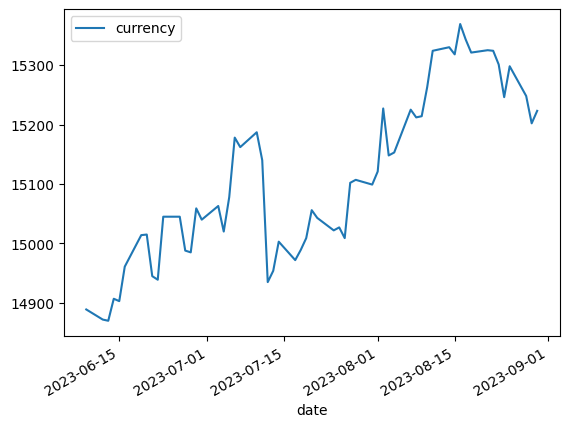

In [39]:
df.plot(kind='line')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<Axes: xlabel='date'>

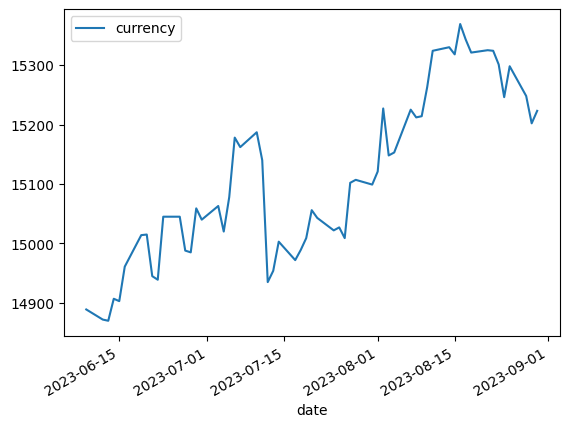

In [40]:
df.plot(kind='line')

Grafik garis di atas menunjukkan fluktuasi nilai tukar mata uang Rupiah pada US Dollar selama satu semester dari tanggal 15 Juni 2023 hingga 1 September 2023. Nilai tukar mata uang berkisar antara sekitar Rp.14900 hingga Rp.15300. Secara keseluruhan terdapat fluktuasi dalam nilai mata uang US Dollar. Nilai mata Rupiah sempat mengalami penguatan signifikan pada bulan Juli menyentuh di bawah angka 15.000. Sayangnya, setelah bulan juli, nilai Rupiah cenderung melemah dalam tiga bulan selanjutknya. Dengan kata lain, grafik tersebut menunjukkan bahwa nilai tukar mata uang Rupiah berada dalam kisaran di atas 15.000 selama enam bulan terakhir.  


(Put your analysis and conclusion here.)

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.